# eda2 목차 
- 시간대별 상품군 편성 비율(노출 시간 기준)
- 요일별 prime time 분석 - 매출액 기준(feature로 활용할 예정)
- 요일별 시간대별 노출분 추이 그래프
- 경제지표와 월별 매출액 상관관계 분석 

In [4]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform


# if platform.system() == 'Windows':
# # 윈도우인 경우
#     font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#     rc('font', family=font_name)
# else:    
# # Mac 인 경우
#     rc('font', family='AppleGothic')
    
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 

import warnings

warnings.filterwarnings(action = 'ignore') 


try:
    if platform.system()=="Windows":
        font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.ttf").get_name()
        rc("font",family=font_name)
    else:
        rc('font',family='AppleGothic')
except:
    pass

matplotlib.rcParams['axes.unicode_minus']=False

sales = pd.read_excel('sales.xlsx', header=1)
sales.head()

# 무형 지우기
sales.drop(sales[sales["상품군"]=="무형"].index, inplace=True)

# 판매단가 > 취급액 이면 취급액 = 0 

def custom(price, total):
    if price > total:
        return 0
    
    else:
        return total

sales["취급액"] = sales.apply(lambda x : custom(x["판매단가"], x["취급액"]), axis=1)

# 확인
print(sum((sales["판매단가"] > sales["취급액"]) & (sales['취급액'] != 0)))
sales



0


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,NaN,NaN,NaN
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,NaN,1.0,2.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,NaN,200.0,200.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,NaN,NaN,NaN
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,NaN,NaN,NaN
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,NaN,NaN,NaN
38301,2020-01-01 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,NaN,NaN,NaN
38302,2020-01-01 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,NaN,NaN,NaN


In [5]:
# month, day, hour, minute, weekday 열 추가
sales['month'] = pd.DatetimeIndex(sales['방송일시']).month
sales['day'] = pd.DatetimeIndex(sales['방송일시']).day
sales['hour'] = pd.DatetimeIndex(sales['방송일시']).hour
sales['minute'] = pd.DatetimeIndex(sales['방송일시']).minute
sales['weekday'] = pd.DatetimeIndex(sales['방송일시']).weekday
sales['방송날짜'] = pd.DatetimeIndex(sales['방송일시']).date

sales

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,Unnamed: 8,Unnamed: 9,Unnamed: 10,month,day,hour,minute,weekday,방송날짜
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,NaN,NaN,NaN,1,1,6,0,1,2019-01-01
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,NaN,1.0,2.0,1,1,6,0,1,2019-01-01
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,NaN,200.0,200.0,1,1,6,20,1,2019-01-01
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,NaN,NaN,NaN,1,1,6,20,1,2019-01-01
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,NaN,1.0,NaN,1,1,6,40,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,NaN,NaN,NaN,12,31,23,40,1,2019-12-31
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,NaN,NaN,NaN,1,1,0,0,2,2020-01-01
38301,2020-01-01 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,NaN,NaN,NaN,1,1,0,0,2,2020-01-01
38302,2020-01-01 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,NaN,NaN,NaN,1,1,0,0,2,2020-01-01


In [18]:
weather = pd.read_csv('weathers.csv')
weather.head()

,방송일시,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지 주의보 및 경보,평균기온(℃),최고기온(℃),최저기온(℃),season
0,2019-01-01,39.36,26.12,0.01472,0.03156,0.692,0.00428,0,-5.0,-0.6,-8.2,겨울
1,2019-01-02,33.08,21.36,0.01256,0.03524,0.676,0.00464,0,-4.9,0.2,-8.8,겨울
2,2019-01-03,38.80,23.36,0.00716,0.04344,0.736,0.00504,0,-3.5,3.2,-8.4,겨울
3,2019-01-04,59.44,40.36,0.00368,0.05896,1.060,0.00600,0,-1.1,4.1,-6.2,겨울
4,2019-01-05,65.72,42.52,0.01788,0.02812,0.644,0.00512,1,-2.8,1.1,-5.5,겨울


# 시간대별 상품군 편성 비율(노출 시간 기준) 

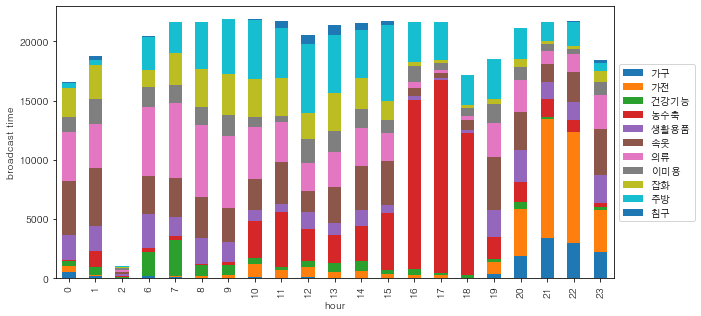

In [76]:
# 노출시간 채우지 않은 데이터 활용 -> 중복 문제 해결 

fig, ax = plt.subplots(figsize=(10,5))
sales.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

In [ ]:
broad_time = sales.groupby(['hour','상품군']).sum()['노출(분)']

In [92]:
sales_time = sales.groupby(['hour', '상품군']).sum()['취급액']

btdf = pd.DataFrame(broad_time)
btdf['취급액'] = sales_time

btdf 

노출(분)           취급액
hour 상품군                            
0    가구     540.000000  1.081895e+09
     가전     520.000000  9.039800e+08
     건강기능   380.000000  4.545280e+08
     농수축    105.466667  4.851740e+08
     생활용품  2100.000000  2.831462e+09
...                ...           ...
23   의류    2920.000000  5.220155e+09
     이미용   1047.266667  2.103373e+09
     잡화     980.200000  1.627775e+09
     주방     700.000000  2.009354e+09
     침구     180.000000  2.578650e+08

[214 rows x 2 columns]

# 요일별 prime time 분석 - 방송 노출분 기준 
- 확인하고 싶은 부분 : 요일별로 상품군 비중이 다를까
- 편성 비중에 비해 높은 매출액이 나오는가(매출액 그래프와 비교 필요)

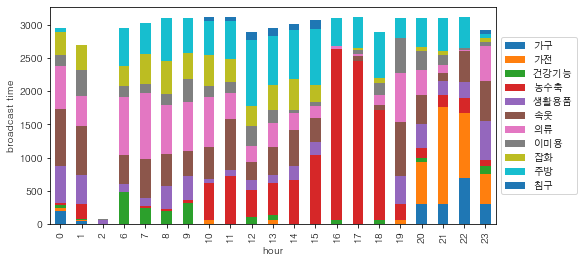

In [114]:
# groupby - weekday 
# weekday 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일

# 월요일 

fig, ax = plt.subplots(figsize=(8,4))

sales0 = sales[sales['weekday']==0] # 월요일 
sales0.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

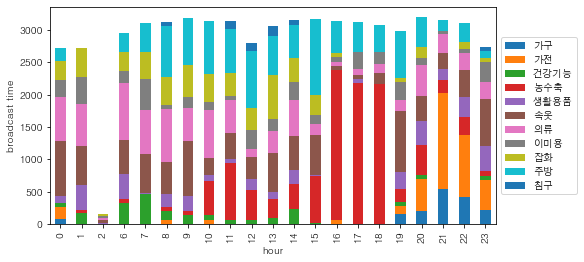

In [115]:
# 화요일 

fig, ax = plt.subplots(figsize=(8,4))
sales1 = sales[sales['weekday']==1]

sales1.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()


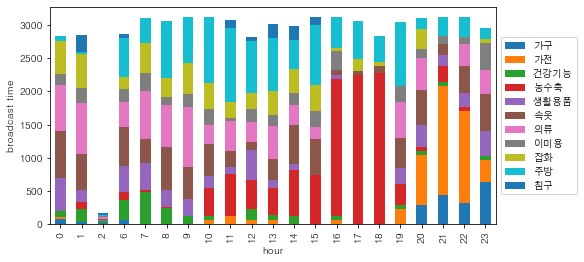

In [116]:
# 수요일

fig, ax = plt.subplots(figsize=(8,4))
sales2 = sales[sales['weekday']==2]

sales2.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

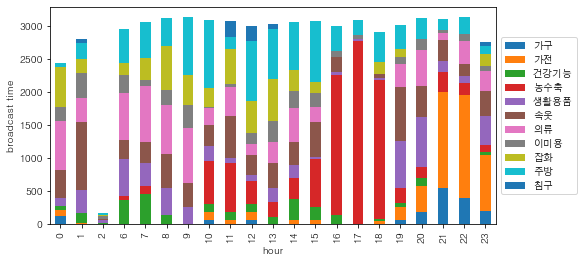

In [117]:
# 목요일

fig, ax = plt.subplots(figsize=(8,4))
sales3 = sales[sales['weekday']==3]

sales3.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

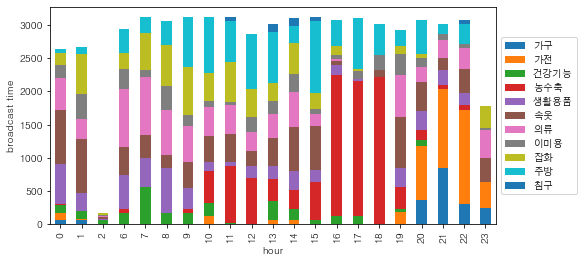

In [118]:
# 금요일

fig, ax = plt.subplots(figsize=(8,4))
sales4 = sales[sales['weekday']==4]

sales4.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

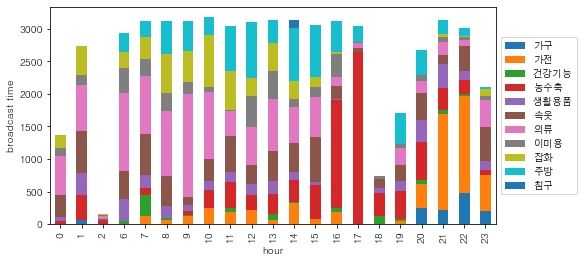

In [119]:
# 토요일

fig, ax = plt.subplots(figsize=(8,4))
sales5 = sales[sales['weekday']==5]

sales5.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

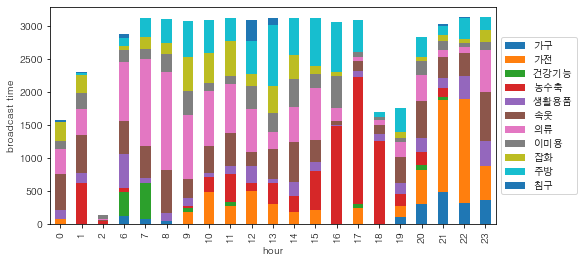

In [120]:
# 일요일

fig, ax = plt.subplots(figsize=(8,4))
sales6 = sales[sales['weekday']==6]

sales6.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

# 요일별 prime time 분석 - 매출액 기준  -> 사용 x mean으로 수정 후 활용 해야함

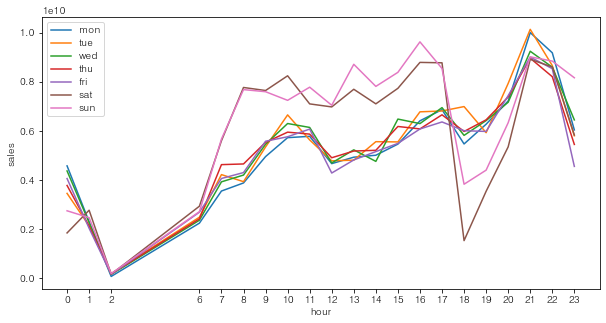

In [123]:
#요일별 시간별 매출액(취급액) 
# 평일 매출액 groupby(sum) (월요일 ~ 금요일) 

hour_sales_sum0 = sales0.groupby('hour')['취급액'].sum()
hour_sales_sum1 = sales1.groupby('hour')['취급액'].sum()
hour_sales_sum2 = sales2.groupby('hour')['취급액'].sum()
hour_sales_sum3 = sales3.groupby('hour')['취급액'].sum()
hour_sales_sum4 = sales4.groupby('hour')['취급액'].sum()

# 주말 매출액  groupby
hour_sales_sum5 = sales5.groupby('hour')['취급액'].sum()
hour_sales_sum6 = sales6.groupby('hour')['취급액'].sum()


fig, ax = plt.subplots(figsize=(10,5))  # figsize - 도화지 사이즈 

# 평일 추이 그려보기. 
ax.plot(hour_sales_sum0.index, hour_sales_sum0, label='mon')
ax.plot(hour_sales_sum1.index, hour_sales_sum1, label='tue')
ax.plot(hour_sales_sum2.index, hour_sales_sum2, label='wed')
ax.plot(hour_sales_sum3.index, hour_sales_sum3, label='thu')
ax.plot(hour_sales_sum4.index, hour_sales_sum4, label='fri')

# 주말 추이도 그려보자. (갈색 - 토요일 / 핑크 - 일요일)
ax.plot(hour_sales_sum5.index, hour_sales_sum5, label='sat') 
ax.plot(hour_sales_sum6.index, hour_sales_sum6, label='sun')

plt.xticks(hour_sales_sum0.index)

plt.xlabel('hour')
plt.ylabel('sales')

plt.legend(loc='upper left')

# 시간대별 평일 매출 feature 만들기 

In [225]:
weekday_Wprime = np.array([hour_sales_sum0, hour_sales_sum1, hour_sales_sum2, hour_sales_sum3, hour_sales_sum4]).mean(axis=0)

In [226]:
weekday_Wprime

array([4.0451696e+09, 2.1689638e+09, 1.4476760e+08, 2.4359302e+09,
       4.0743332e+09, 4.1919248e+09, 5.3720308e+09, 6.0761072e+09,
       5.8977828e+09, 4.6646430e+09, 4.9909998e+09, 5.1372570e+09,
       5.8317826e+09, 6.3275970e+09, 6.7281194e+09, 6.0510570e+09,
       6.2084282e+09, 7.4264528e+09, 9.4708112e+09, 8.6363884e+09,
       5.6566888e+09])

In [227]:
hours = [0,1,2,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

In [228]:
for i,hour in enumerate(hours):
    sales[sales['weekday'].isin([0,1,2,3,4]) & sales['hour'].isin([hour])]['Wprime'] = weekday_Wprime[i]

In [229]:
for i,hour in enumerate(hours):
    sales[sales['weekday'].isin([5,6]) & sales['hour'].isin([hour])]['Wprime'] = weekend_Wprime[i]

In [230]:
sales[sales['weekday'].isin([5,6]) & sales['hour'].isin([1])]['Wprime'] = weekday_Wprime[1]

In [231]:
sales[sales['weekday'].isin([5,6]) & sales['hour'].isin([1])]['Wprime'].replace(inplace = True, to_replace= 'dict', value = {0 : 1})

In [232]:
sales[sales['weekday'].isin([5,6]) & sales['hour'].isin([1])]['Wprime'] 

345      0
346      0
347      0
348      0
349      0
        ..
37388    0
37947    0
37948    0
38050    0
38051    0
Name: Wprime, Length: 412, dtype: int64

# 시간대별 주말 매출 feature

In [233]:
weekend_Wprime = np.array([hour_sales_sum5, hour_sales_sum6]).mean(axis=0)

# 요일별 시간대별 노출분 

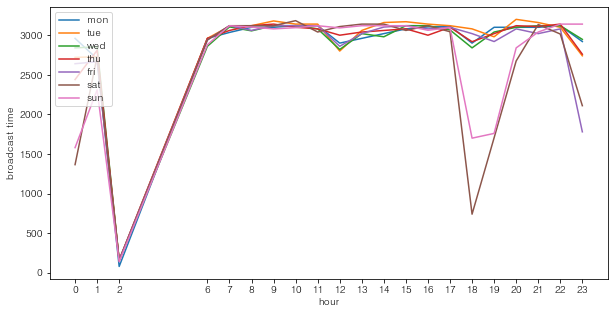

In [127]:
#요일별 시간별 매출액(취급액) 
# 평일 매출액 groupby(sum) (월요일 ~ 금요일) 

hour_broad_sum0 = sales0.groupby('hour')['노출(분)'].sum()
hour_broad_sum1 = sales1.groupby('hour')['노출(분)'].sum()
hour_broad_sum2 = sales2.groupby('hour')['노출(분)'].sum()
hour_broad_sum3 = sales3.groupby('hour')['노출(분)'].sum()
hour_broad_sum4 = sales4.groupby('hour')['노출(분)'].sum()

# 주말 매출액  groupby
hour_broad_sum5 = sales5.groupby('hour')['노출(분)'].sum()
hour_broad_sum6 = sales6.groupby('hour')['노출(분)'].sum()


fig, ax = plt.subplots(figsize=(10,5))  # figsize - 도화지 사이즈 

ax.plot(hour_broad_sum0.index, hour_broad_sum0, label='mon')
ax.plot(hour_broad_sum1.index, hour_broad_sum1, label='tue')
ax.plot(hour_broad_sum2.index, hour_broad_sum2, label='wed')
ax.plot(hour_broad_sum3.index, hour_broad_sum3, label='thu')
ax.plot(hour_broad_sum4.index, hour_broad_sum4, label='fri')

# 주말 추이도 그려보자. (갈색 - 토요일 / 핑크 - 일요일)
ax.plot(hour_broad_sum5.index, hour_broad_sum5, label='sat') 
ax.plot(hour_broad_sum6.index, hour_broad_sum6, label='sun')

plt.xticks(hour_broad_sum0.index)

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.legend(loc='upper left')

# prime time 매출이 전체 매출액의 몇%인지 수치로 확인

In [100]:
# 평일 매출액 groupby(sum) (월요일 ~ 금요일) 

# 월요일 먼저 구해보기 
hour_sales_sum0 = sales0.groupby('hour')['취급액'].sum().reset_index()

# 특정 요일의 시간대별 매출액을 전체 매출액으로 나눠주기 -> 각 시간대에 매출이 몇퍼센트 나왔는지 확인할 수 있음. 
hour_sales_sum0['rate'] = hour_sales_sum0['취급액'] / hour_sales_sum0['취급액'].sum()

# hour_sales_sum1 = sales1.groupby('hour')['취급액'].sum()
# hour_sales_sum2 = sales2.groupby('hour')['취급액'].sum()
# hour_sales_sum3 = sales3.groupby('hour')['취급액'].sum()
# hour_sales_sum4 = sales4.groupby('hour')['취급액'].sum()

# # 주말 매출액  groupby
# hour_sales_sum5 = sales5.groupby('hour')['취급액'].sum()
# hour_sales_sum6 = sales6.groupby('hour')['취급액'].sum()


hour_sales_sum0.sort_values(by=['취급액'], ascending=False)

,hour,취급액,rate
18,21,1.000400e+10,0.090475
19,22,9.182485e+09,0.083046
17,20,7.217471e+09,0.065274
14,17,6.864460e+09,0.062082
13,16,6.409541e+09,0.057967
16,19,6.271025e+09,0.056715
20,23,6.038515e+09,0.054612
8,11,5.777600e+09,0.052252
7,10,5.723341e+09,0.051761
15,18,5.466888e+09,0.049442


In [ ]:
# 편성비중과 매출액 비중 비교하기. 

# feature에 어떻게 적용할 것인지?
# 

# 평일과 주말의 prime time 비교하기 

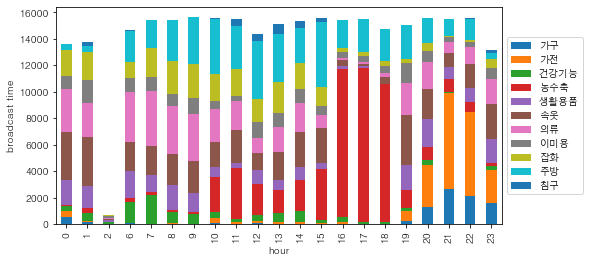

In [69]:
# 평일 prime tiem 상품군 확인 

wday = sales[sales['weekday'].isin([0,1,2,3,4])]

fig, ax = plt.subplots(figsize=(8,4))

wday.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

In [ ]:
weekend = sales[sales['weekday'].isin([5,6])]

fig, ax = plt.subplots(figsize=(8,4))

weekend.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()


# 매출액 rate 구하기 (평일 vs 주말)

In [7]:
# wday - 평일 시간대별 매출액 비율 구하기 

wday = sales[sales['weekday'].isin([0,1,2,3,4])]

wday_sum = wday.groupby('hour')['취급액'].sum().reset_index()

# 특정 요일의 시간대별 매출액을 전체 매출액으로 나눠주기 -> 각 시간대에 매출이 몇퍼센트 나왔는지 확인할 수 있음. 
wday_sum['rate'] = np.round(wday_sum['취급액'] / wday_sum['취급액'].sum(),3)

wday_sum.sort_values(by=['취급액'], ascending=False)


,hour,취급액,rate
18,21,4.735406e+10,0.085
19,22,4.318194e+10,0.077
17,20,3.713226e+10,0.067
14,17,3.364060e+10,0.060
13,16,3.163798e+10,0.057
16,19,3.104214e+10,0.056
7,10,3.038054e+10,0.054
15,18,3.025528e+10,0.054
8,11,2.948891e+10,0.053
12,15,2.915891e+10,0.052


In [94]:
# 주말 매출액 비율 확인하기 

weekend = sales[sales['weekday'].isin([5,6])]

weekend_sum = weekend.groupby('hour')['취급액'].sum().reset_index()

# 특정 요일의 시간대별 매출액을 전체 매출액으로 나눠주기 -> 각 시간대에 매출이 몇퍼센트 나왔는지 확인할 수 있음. 
weekend_sum['rate'] = weekend_sum['취급액'] / weekend_sum['취급액'].sum()

weekend_sum.sort_values(by=['취급액'], ascending=False)


,hour,취급액,rate
13,16,1.841777e+10,0.070932
18,21,1.793317e+10,0.069066
19,22,1.744698e+10,0.067193
14,17,1.731716e+10,0.066693
10,13,1.640718e+10,0.063189
12,15,1.611885e+10,0.062078
7,10,1.548807e+10,0.059649
5,8,1.544967e+10,0.059501
6,9,1.524009e+10,0.058694
11,14,1.491361e+10,0.057436


In [93]:
corr_ = np.corrcoef(btdf['노출(분)'],btdf['취급액'])
corr_

array([[1.        , 0.95500542],
       [0.95500542, 1.        ]])

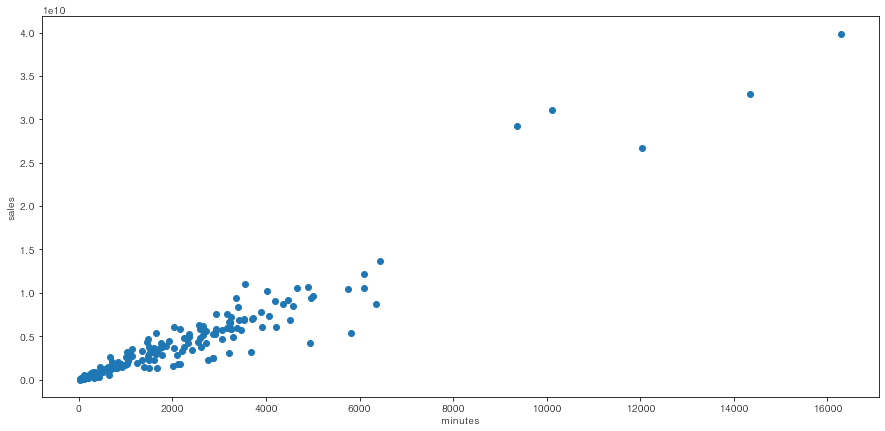

In [94]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(btdf['노출(분)'],btdf['취급액'])

plt.xlabel('minutes')
plt.ylabel('sales')

plt.show()

In [95]:
# 시간대별로 노출분이 가장 높은 데이터 5개 제외

dtdf3 = btdf[btdf['노출(분)']>8000]
dtdf3

,,노출(분),취급액
hour,상품군,,
16,농수축,14347.400000,3.296942e+10
17,농수축,16281.483333,3.988054e+10
18,농수축,12038.033333,2.663625e+10
21,가전,10115.000000,3.103038e+10
22,가전,9375.000000,2.919333e+10


In [96]:
# 8000분 초과 값 제거 후 선형 관계 파악 

btdf2 = btdf[btdf['노출(분)']< 8000]
btdf2

btdf2

노출(분)           취급액
hour 상품군                            
0    가구     540.000000  1.081895e+09
     가전     520.000000  9.039800e+08
     건강기능   380.000000  4.545280e+08
     농수축    105.466667  4.851740e+08
     생활용품  2100.000000  2.831462e+09
...                ...           ...
23   의류    2920.000000  5.220155e+09
     이미용   1047.266667  2.103373e+09
     잡화     980.200000  1.627775e+09
     주방     700.000000  2.009354e+09
     침구     180.000000  2.578650e+08

[209 rows x 2 columns]

In [1]:
pd.merge(sales,btdf2)

NameError: name 'pd' is not defined

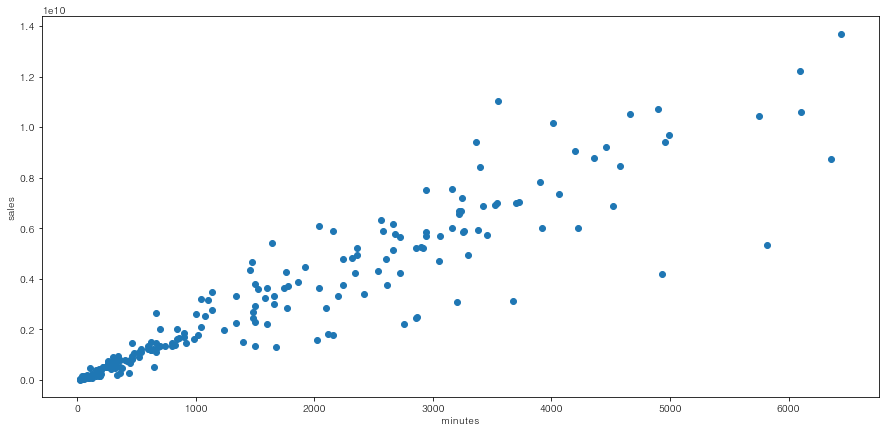

In [97]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(btdf2['노출(분)'],btdf2['취급액'])

plt.xlabel('minutes')
plt.ylabel('sales')

plt.show()

# 판매단가에 따른 무이자, 일시불 매출액 추이

In [98]:
zero = sales[sales['상품명'].str.contains('무이자') | sales['상품명'].str.contains('일시불')]


zero2 = sales[sales['상품명'].str.contains('무이자')].sum()['취급액']
once2 = sales[sales['상품명'].str.contains('일시불')].sum()['취급액']

print(zero2, once2)
a = zero2 - once2 
a

zero3 = sales[sales['상품명'].str.contains('무이자')]
once3 = sales[sales['상품명'].str.contains('일시불')]

zero3 = zero3.groupby('마더코드')['취급액'].sum().reset_index()

once3 = once3.groupby('마더코드')['취급액'].sum().reset_index()

price3 = zero.groupby('마더코드')['판매단가'].mean().reset_index()

# 총 취급액은 무이자(할부) < 일시불 


80351030000.0 95041077000.0


In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

# ax.scatter(price3, once3) # 일시불
ax.scatter(zero.index, zero3) # 할부 

plt.xlabel('price')
plt.ylabel('sales')

plt.show()

In [101]:
# 월별 매출액 통계

sales.groupby('month').sum()['취급액']

month
1     6.892150e+10
2     5.958138e+10
3     6.462860e+10
4     6.077887e+10
5     6.890008e+10
6     6.633750e+10
7     6.901510e+10
8     6.901195e+10
9     6.746911e+10
10    6.884353e+10
11    7.393544e+10
12    7.991723e+10
Name: 취급액, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

# ax.scatter(price3, once3) # 일시불
ax.scatter(zero.index, zero3) # 할부 

plt.xlabel('price')
plt.ylabel('sales')

plt.show()

# 경제지표와 매출액 관계 분석
## 개인 신용카드금액과 월별 매출액(sum) 상관관계 분석 -> 0.8 이상
- 문제 : 2020년 6월 데이터가 08.17 현재까지 안올라오고 있음... 

In [73]:
# 2019.01 - 12 월별 신용카드 금액

credit = np.array([52039328000000,45466358000000,51678679000000,50723386000000,53425506000000,50508891000000,53730267000000,52485647000000,50893769000000,54017093000000,53814165000000,55909956000000])
credit = (credit-credit.min()) / (credit.max() - credit.min())

df_credit = pd.DataFrame(credit, columns=['신용카드금액'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])

month_sales = sales.groupby('month').sum()['취급액'].reset_index()['취급액']

month_sales = (month_sales - month_sales.min()) / (month_sales.max() - month_sales.min())

df_credit


,신용카드금액
1,0.629378
2,0.000000
3,0.594845
4,0.503373
5,0.762108
6,0.482835
7,0.791289
8,0.672114
9,0.519688
10,0.818754


In [74]:
corr_2 = np.corrcoef(df_credit['신용카드금액'],month_sales)
corr_2

array([[1.        , 0.84237233],
       [0.84237233, 1.        ]])

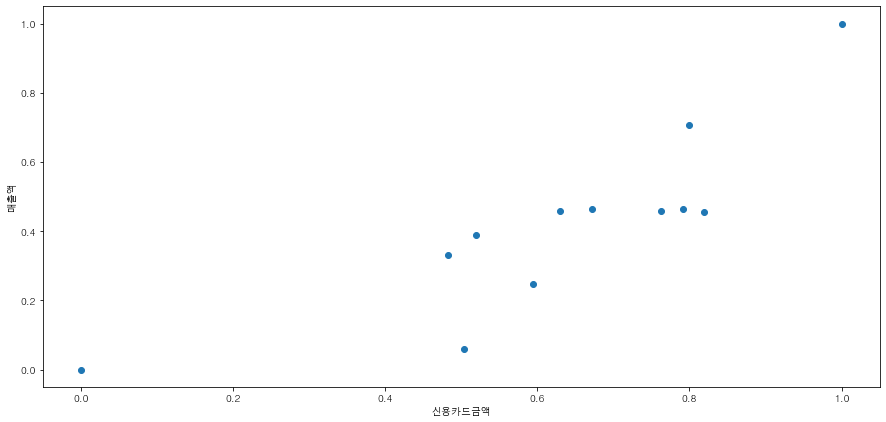

In [75]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(df_credit['신용카드금액'], month_sales) # 할부 

plt.xlabel('신용카드금액')
plt.ylabel('매출액')

plt.show()

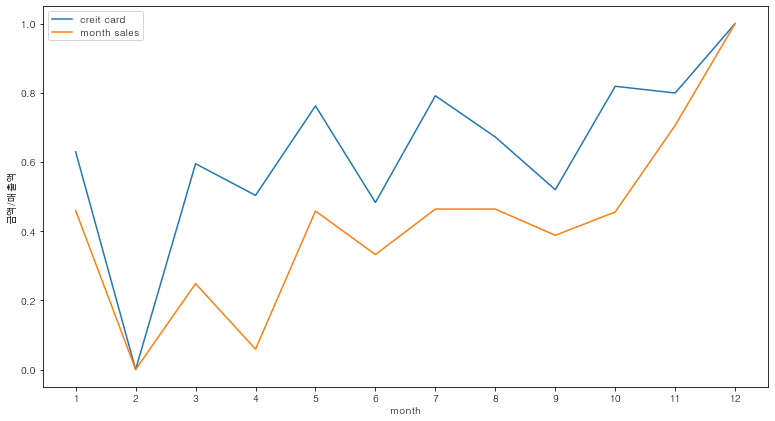

In [76]:
fig, ax = plt.subplots(figsize=(13,7))

ax.plot(df_credit.index, df_credit['신용카드금액'], label='creit card') # 할부 
ax.plot(month_sales.index, month_sales, label='month sales')

plt.xlabel('month')
plt.ylabel('금액/매출액')
plt.legend(loc='upper left')

plt.show()

# 생활물가지수or소비자물가지수 월별 매출액(sum) 상관관계 분석  -> 사용 X

In [7]:
# 2019.01 - 12 생활물가지수  -> 상관관계 : 0.3 

liv_p_index= np.array([104.030,104.610,104.450,104.810,105.290,105.190,104.400,104.730,105.570,105.960,105.370,105.510])


# 소비자물가지수  -> 상관관계 : 0.2 
CPI = np.array([104.240,104.690,104.490,104.870,105.050,104.880,104.560,104.810,105.200,105.460,104.870,105.120])


df_CPI = pd.DataFrame(CPI, columns=['소비자물가지수'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])

month_sales = sales.groupby('month').sum()['취급액'].reset_index()['취급액']

df_CPI

,소비자물가지수
1,104.24
2,104.69
3,104.49
4,104.87
5,105.05
6,104.88
7,104.56
8,104.81
9,105.20
10,105.46


In [8]:
corr_3 = np.corrcoef(df_CPI['소비자물가지수'],month_sales)
corr_3

array([[1.        , 0.26895969],
       [0.26895969, 1.        ]])

## 소비자 심리지수와 월별 매출액(sum) 상관관계 분석 -> 사용 x 

In [187]:
cst = np.array([97.5,99.6,99.8,101.7,97.9,97.6,95.9,92.4,97.0,98.6,101.0,100.5])

df_cst = pd.DataFrame(cst, columns=['소비자심리지수'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])

In [190]:
corr_3 =np.corrcoef(df_cst['소비자심리지수'],month_sales)
corr_3

array([[ 1.        , -0.03777535],
       [-0.03777535,  1.        ]])


# 경기 동행지표 : 소매판매액지수
- 소비 동향을 파악하기 위해 작성되는 지표. 백화점, 대형마트, 편의점 등 소매판매점의 매월 판매금액을 조사하여 작성하는 통계.

In [81]:
sal_index = np.array([109.8,99.8,116.0,111.4,116.6,110.0,110.5,111.4,113.3,115.8,120.5,121.6,])
sal_index = (sal_index - sal_index.min()) / (sal_index.max() - sal_index.min())

dfsal_index = pd.DataFrame(sal_index, columns=['소매판매액지수'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])

month_sales = sales.groupby('month').sum()['취급액'].reset_index()['취급액']
month_sales = (month_sales - month_sales.min()) / (month_sales.max() - month_sales.min())

dfsal_index

,소매판매액지수
1,0.458716
2,0.000000
3,0.743119
4,0.532110
5,0.770642
6,0.467890
7,0.490826
8,0.532110
9,0.619266
10,0.733945


In [78]:
corr_4 = np.corrcoef(dfsal_index['소매판매액지수'],month_sales)
corr_4

array([[1.        , 0.77036093],
       [0.77036093, 1.        ]])

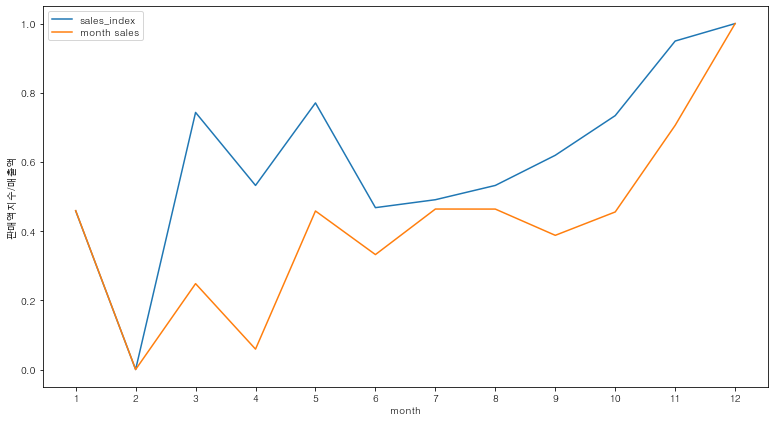

In [82]:
fig, ax = plt.subplots(figsize=(13,7))

ax.plot(dfsal_index.index, dfsal_index['소매판매액지수'], label='sales_index') # 할부 
ax.plot(month_sales.index, month_sales, label='month sales')

plt.xlabel('month')
plt.ylabel('판매액지수/매출액')
plt.legend(loc='upper left')

plt.show()

# 후행지표2 : 취업자수   -> 사용 X 

In [83]:


employment = np.array([26232,
26346,
26805,
27038,
27322,
27408,
27383,
27358,
27404,
27509,
27515,
27154])

employment = (employment - employment.min()) / (employment.max() - employment.min())

df_emplo = pd.DataFrame(employment, columns=['취업자수'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])

month_sales = sales.groupby('month').sum()['취급액'].reset_index()['취급액']
month_sales = (month_sales - month_sales.min()) / (month_sales.max() - month_sales.min())

df_emplo

,취업자수
1,0.000000
2,0.088854
3,0.446610
4,0.628215
5,0.849571
6,0.916602
7,0.897116
8,0.877631
9,0.913484
10,0.995323


In [85]:
corr_5 = np.corrcoef(df_emplo['취업자수'],month_sales)
corr_5

array([[1.        , 0.40209472],
       [0.40209472, 1.        ]])